In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

tweets = pd.read_csv('train.csv', encoding='latin-1')
tweets['longitud'] = tweets['text'].str.len()
tweets.head(20)

Populating the interactive namespace from numpy and matplotlib


,id,keyword,location,text,target,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


In [2]:
tweets_description = tweets['longitud'].describe()
tweets_description = tweets_description.to_frame()
tweets_description.rename(index={'mean':'media', 'min':'mínima', 'max':'máxima'}, inplace=True)
tweets_description.drop(['count', 'std', '25%', '50%', '75%'], inplace=True)
tweets_description['longitud'] = tweets_description['longitud'].astype(int)
tweets_description

,longitud
media,101
mínima,7
máxima,163


In [3]:
bins = pd.cut(tweets['longitud'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
tweets['bin'] = bins
tweets.head(20)

,id,keyword,location,text,target,longitud,bin
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"(60, 80]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"(20, 40]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"(120, 140]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"(60, 80]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"(80, 100]"
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,"(100, 120]"
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,"(80, 100]"
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,"(40, 60]"
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,"(60, 80]"
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,"(40, 60]"


In [4]:
true_tweets = tweets[tweets.target==1].groupby('bin').agg({'target':'count'})
true_tweets['% relative to  false'] = round(true_tweets['target'] * 100 / sum(true_tweets['target']), 2);
true_tweets.rename(columns={'target':'count of false'}, inplace=True)
true_tweets

,count of false,% relative to false
bin,,
"(0, 20]",7,0.21
"(20, 40]",73,2.23
"(40, 60]",174,5.32
"(60, 80]",352,10.76
"(80, 100]",619,18.92
"(100, 120]",592,18.10
"(120, 140]",1278,39.07
"(140, 160]",175,5.35
"(160, 180]",1,0.03


In [5]:
false_tweets = tweets[tweets.target==0].groupby('bin').agg({'target':'count'})
false_tweets['% relative to true'] = round(false_tweets['target'] * 100 / sum(false_tweets['target']), 2);
false_tweets.rename(columns={'target':'count of true'}, inplace=True)
false_tweets

,count of true,% relative to true
bin,,
"(0, 20]",71,1.64
"(20, 40]",322,7.42
"(40, 60]",486,11.19
"(60, 80]",610,14.05
"(80, 100]",662,15.25
"(100, 120]",712,16.40
"(120, 140]",1273,29.32
"(140, 160]",205,4.72
"(160, 180]",1,0.02


In [6]:
tweets_by_truth_value = pd.merge(false_tweets, true_tweets, on='bin')
tweets_by_truth_value

,count of true,% relative to true,count of false,% relative to false
bin,,,,
"(0, 20]",71,1.64,7,0.21
"(20, 40]",322,7.42,73,2.23
"(40, 60]",486,11.19,174,5.32
"(60, 80]",610,14.05,352,10.76
"(80, 100]",662,15.25,619,18.92
"(100, 120]",712,16.40,592,18.10
"(120, 140]",1273,29.32,1278,39.07
"(140, 160]",205,4.72,175,5.35
"(160, 180]",1,0.02,1,0.03


In [7]:
tweets_by_truth_value_counts = tweets_by_truth_value[['count of true', 'count of false']]
tweets_by_truth_value_counts

,count of true,count of false
bin,,
"(0, 20]",71,7
"(20, 40]",322,73
"(40, 60]",486,174
"(60, 80]",610,352
"(80, 100]",662,619
"(100, 120]",712,592
"(120, 140]",1273,1278
"(140, 160]",205,175
"(160, 180]",1,1


<Figure size 936x936 with 0 Axes>

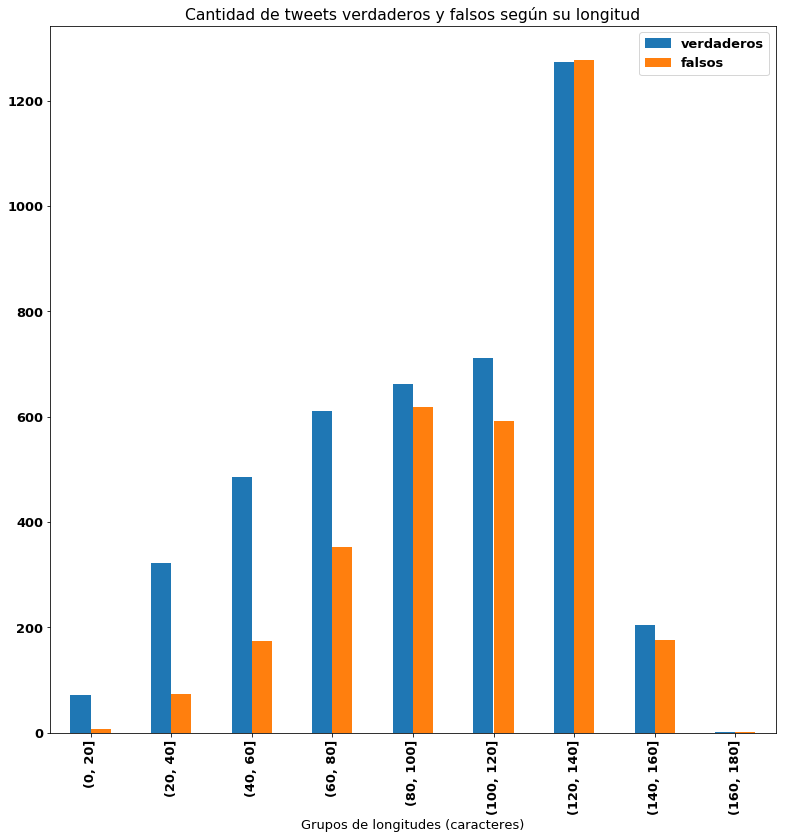

In [8]:
plt.rcParams['font.size'] = 13
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.figsize'] = [13,13]

fig = plt.figure()
tweets_by_truth_value_counts.plot(kind='bar')
plt.title('Cantidad de tweets verdaderos y falsos según su longitud')
plt.xlabel('Grupos de longitudes (caracteres)')
plt.legend(['verdaderos','falsos'])

plt.show()